# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


<ipython-input-3-fb7e727a30fd>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['hourly_datetime'] = pd.to_datetime(


Unmapped season values found:
           date  season  yr  mnth  hr  holiday  weekday  workingday  \
4010   6/21/11     NaN   0     6   0        0        2           1   
4011   6/21/11     NaN   0     6   1        0        2           1   
4012   6/21/11     NaN   0     6   2        0        2           1   
4013   6/21/11     NaN   0     6   3        0        2           1   
4014   6/21/11     NaN   0     6   4        0        2           1   
...        ...     ...  ..   ...  ..      ...      ...         ...   
15014  9/22/12     NaN   1     9  19        0        6           0   
15015  9/22/12     NaN   1     9  20        0        6           0   
15016  9/22/12     NaN   1     9  21        0        6           0   
15017  9/22/12     NaN   1     9  22        0        6           0   
15018  9/22/12     NaN   1     9  23        0        6           0   

       weathersit  temp   atemp   hum  windspeed  cnt     hourly_datetime  
4010            1  0.62  0.5909  0.78     0.1642   3

<ipython-input-3-fb7e727a30fd>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data['season'].fillna(0, inplace=True)
<ipython-input-3-fb7e727a30fd>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

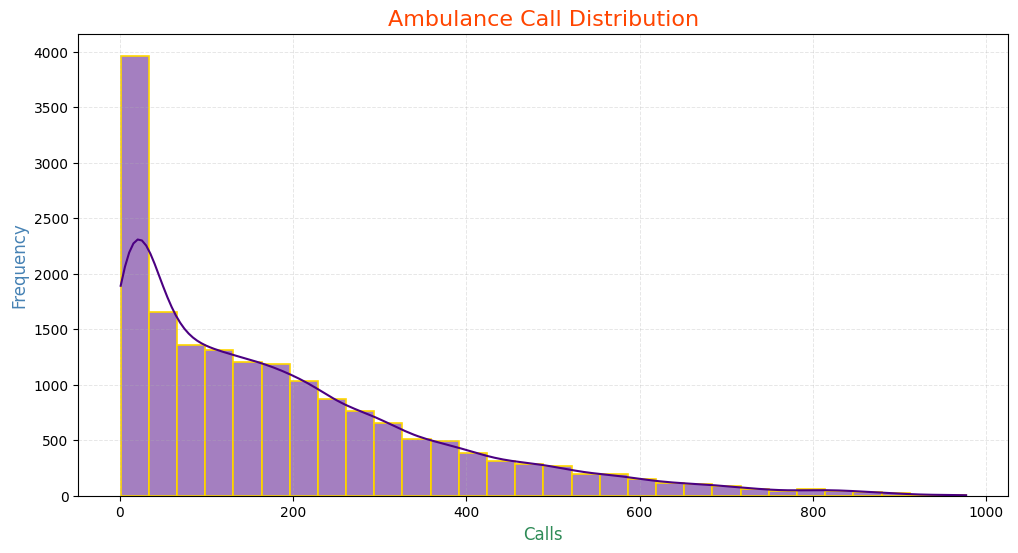

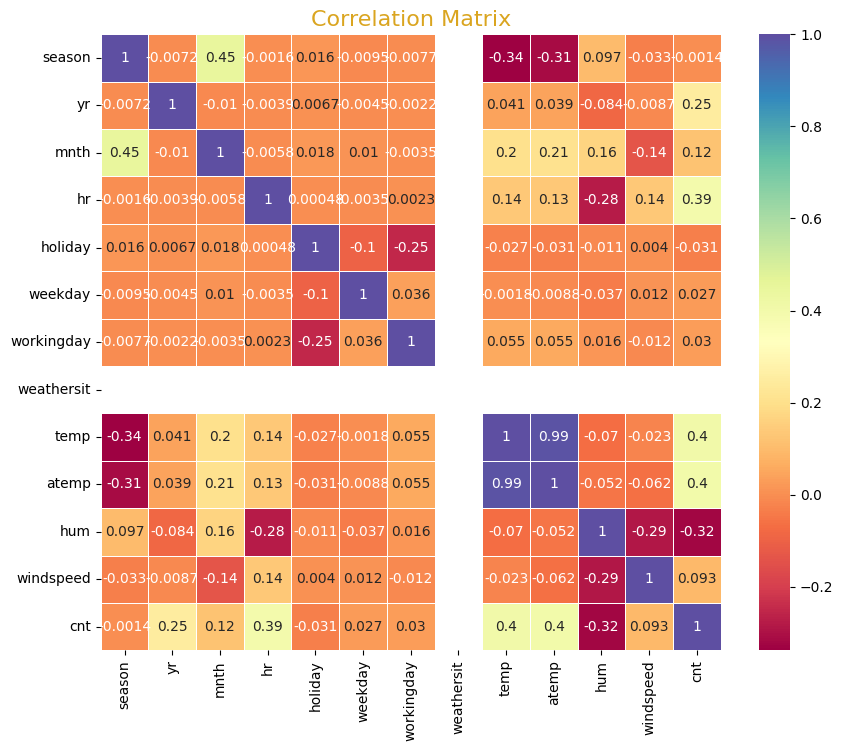

<ipython-input-3-fb7e727a30fd>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_data, palette="mako")


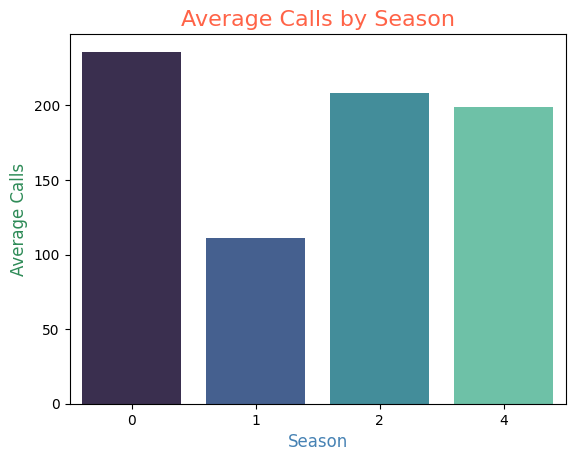

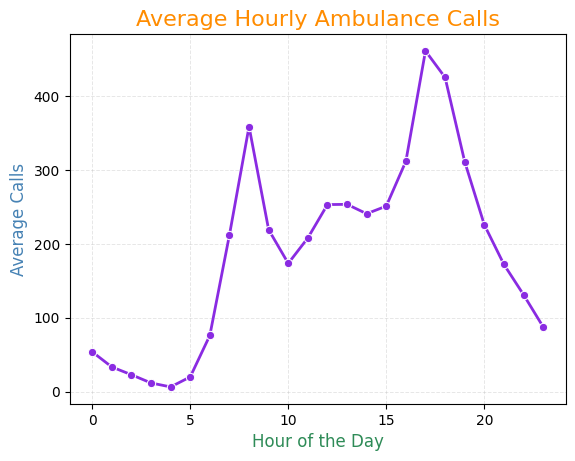

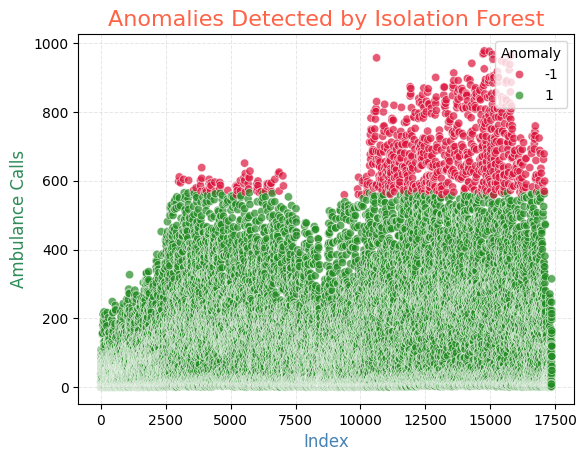

Random Forest Regressor - MSE: 2577.9068496410023, R2: 0.9185891879865451


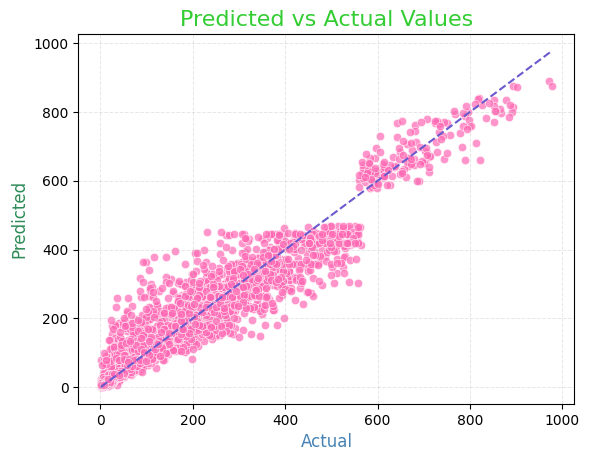

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr2jz04n6/ycmc8xt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr2jz04n6/ywbkejhb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pack

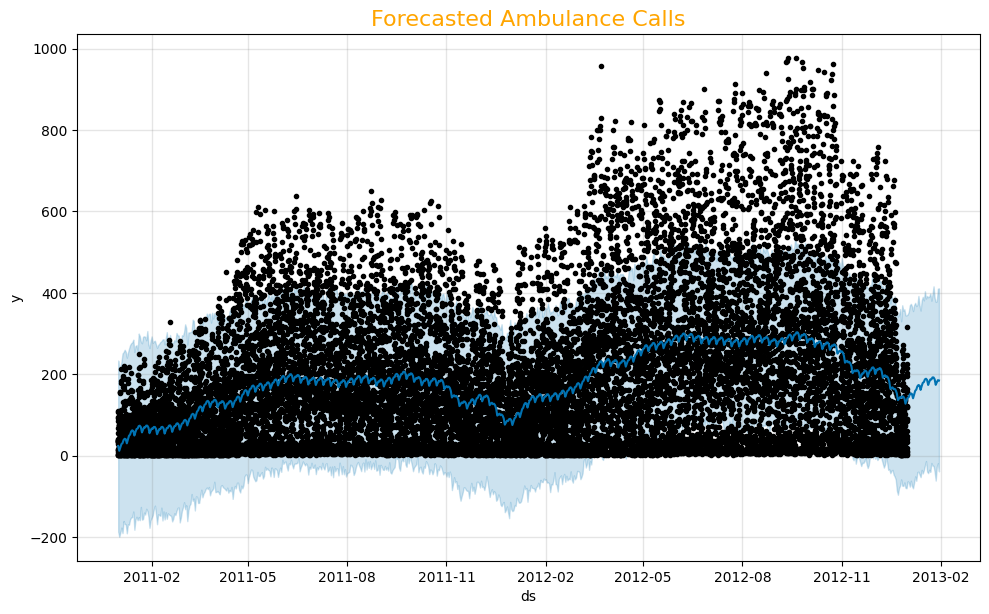

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet


class MotorbikeDataProcessor:
    def __init__(self, filepath):
        self.data = pd.read_csv(filepath)
        self._prepare_data()

    def _prepare_data(self):
        self.data.columns = self.data.columns.str.strip().str.lower()
        self.data['hourly_datetime'] = pd.to_datetime(
            self.data['date'] + " " + self.data['hr'].astype(str) + ":00", errors='coerce'
        )
        self.data.drop(columns=["index"], errors='ignore', inplace=True)

        if 'season' in self.data.columns:
            self.data['season'] = self.data['season'].astype(str).str.strip().str.lower().map({
                'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4
            })
            if self.data['season'].isnull().any():
                print("Unmapped season values found:\n", self.data[self.data['season'].isnull()])
                self.data['season'].fillna(0, inplace=True)
            self.data['season'] = self.data['season'].astype(int)
        else:
            raise KeyError("'season' column is missing from the dataset.")

        if 'weathersit' in self.data.columns:
            self.data['weathersit'] = self.data['weathersit'].astype(str).str.title().map({
                'Clear': 1, 'Mist': 2, 'Light Snow': 3, 'Heavy Rain': 4
            })
            if self.data['weathersit'].isnull().any():
                print("Unmapped weathersit values found:\n", self.data[self.data['weathersit'].isnull()])
                self.data['weathersit'].fillna(0, inplace=True)
            self.data['weathersit'] = self.data['weathersit'].astype(int)
        else:
            raise KeyError("'weathersit' column is missing from the dataset.")

    def get_processed_data(self):
        return self.data



class DataInsights:
    def __init__(self, data):
        self.data = data

    def analyze_distributions(self):
        plt.figure(figsize=(12, 6))
        sns.histplot(self.data['cnt'], bins=30, kde=True, color="#4B0082", edgecolor="#FFD700", linewidth=1.2)
        plt.title("Ambulance Call Distribution", fontsize=16, color="#FF4500")
        plt.xlabel("Calls", fontsize=12, color="#2E8B57")
        plt.ylabel("Frequency", fontsize=12, color="#4682B4")
        plt.grid(alpha=0.3, linestyle="--", linewidth=0.7)
        plt.show()

    def analyze_correlations(self):
        numeric_data = self.data.select_dtypes(include=['number'])
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            numeric_data.corr(),
            annot=True,
            cmap="Spectral",
            linewidths=0.5
        )
        plt.title("Correlation Matrix", fontsize=16, color="#DAA520")
        plt.show()

    def analyze_seasonal_effect(self):
        if 'season' not in self.data.columns or self.data['season'].isnull().all():
            raise KeyError("'season' column is missing or has no valid data. Please check preprocessing.")
        seasonal_data = self.data.groupby('season')['cnt'].mean().reset_index()
        sns.barplot(x='season', y='cnt', data=seasonal_data, palette="mako")
        plt.title("Average Calls by Season", fontsize=16, color="#FF6347")
        plt.xlabel("Season", fontsize=12, color="#4682B4")
        plt.ylabel("Average Calls", fontsize=12, color="#2E8B57")
        plt.show()

    def hourly_analysis(self):
        hourly_data = self.data.groupby('hr')['cnt'].mean().reset_index()
        sns.lineplot(
            x='hr', y='cnt', data=hourly_data,
            marker="o", color="#8A2BE2", linewidth=2
        )
        plt.title("Average Hourly Ambulance Calls", fontsize=16, color="#FF8C00")
        plt.xlabel("Hour of the Day", fontsize=12, color="#2E8B57")
        plt.ylabel("Average Calls", fontsize=12, color="#4682B4")
        plt.grid(alpha=0.3, linestyle="--", linewidth=0.7)
        plt.show()


class AnomalyDetectionHandler:
    def __init__(self, data):
        self.data = data

    def detect_isolation_forest(self):
        model = IsolationForest(contamination=0.05, random_state=42)
        self.data['iso_anomaly'] = model.fit_predict(self.data[['cnt']])
        return self.data

    def plot_anomalies(self):
        sns.scatterplot(
            x=np.arange(len(self.data)), y=self.data['cnt'], hue=self.data['iso_anomaly'],
            palette={-1: "#DC143C", 1: "#228B22"}, alpha=0.7
        )
        plt.title("Anomalies Detected by Isolation Forest", fontsize=16, color="#FF6347")
        plt.xlabel("Index", fontsize=12, color="#4682B4")
        plt.ylabel("Ambulance Calls", fontsize=12, color="#2E8B57")
        plt.legend(title="Anomaly", loc="upper right")
        plt.grid(alpha=0.3, linestyle="--", linewidth=0.7)
        plt.show()


class RegressionAnalysis:
    def __init__(self, data):
        self.data = data
        self.features = [col for col in self.data.columns if col not in ['cnt', 'hourly_datetime', 'date']]
        self.target = 'cnt'

    def preprocess(self):
        X = self.data[self.features]
        y = self.data[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        return X_train, X_test, y_train, y_test

    def train_model(self):
        X_train, X_test, y_train, y_test = self.preprocess()
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"Random Forest Regressor - MSE: {mse}, R2: {r2}")
        return model, y_test, predictions

    def plot_predictions(self, y_test, predictions):
        sns.scatterplot(x=y_test, y=predictions, alpha=0.7, color="#FF69B4")
        sns.lineplot(x=y_test, y=y_test, color="#6A5ACD", linestyle="--")
        plt.title("Predicted vs Actual Values", fontsize=16, color="#32CD32")
        plt.xlabel("Actual", fontsize=12, color="#4682B4")
        plt.ylabel("Predicted", fontsize=12, color="#2E8B57")
        plt.grid(alpha=0.3, linestyle="--", linewidth=0.7)
        plt.show()


class TimeSeriesModel:
    def __init__(self, data):
        self.data = data[['date', 'cnt']].rename(columns={'date': 'ds', 'cnt': 'y'})

    def forecast(self):
        model = Prophet()
        model.fit(self.data)
        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        model.plot(forecast)
        plt.title("Forecasted Ambulance Calls", fontsize=16, color="#FFA500")
        plt.show()


if __name__ == "__main__":
    file_path = "motorbike_ambulance_calls.csv"
    processor = MotorbikeDataProcessor(file_path)
    data = processor.get_processed_data()

    insights = DataInsights(data)
    insights.analyze_distributions()
    insights.analyze_correlations()
    insights.analyze_seasonal_effect()
    insights.hourly_analysis()

    anomaly_handler = AnomalyDetectionHandler(data)
    anomaly_handler.detect_isolation_forest()
    anomaly_handler.plot_anomalies()

    regression = RegressionAnalysis(data)
    model, y_test, predictions = regression.train_model()
    regression.plot_predictions(y_test, predictions)

    time_series = TimeSeriesModel(data)
    time_series.forecast()


### **Звіт**
-

#### **Опис та підхід до аналізу даних**

Моєю метою було виявлення закономірностей у викликах швидкої допомоги для мотоциклістів залежно від сезонних, часових та екологічних умов, а також визначення аномалій чи подій, які можуть впливати на кількість викликів. Для цього я реалізував вдосконалений структурований підхід, що включає наступні етапи:

1. **Підготовка даних:**
   - Завантажив і очистив дані, видалив стовпець `index`, який не мав аналітичної цінності.
   - Об’єднав змінні `date` і `hr`, щоб створити часовий індекс `hourly_datetime` для детального аналізу часових рядів.
   - Категоричні змінні `season` та `weathersit` було перекодовано у числовий формат за допомогою мапінгу:
     - `spring`, `summer`, `fall`, `winter` → 1, 2, 3, 4.
     - `Clear`, `Mist`, `Light Snow`, `Heavy Rain` → 1, 2, 3, 4.
   - Для усунення некоректних значень або пропусків використав заміну на нульові значення для полів `season` та `weathersit`.

2. **Аналіз даних:**
   - Провів аналіз розподілу викликів (`cnt`) за допомогою гістограми, що допомогло виявити піки та аномалії.
   - Здійснив кореляційний аналіз між числовими змінними (`temp`, `hum`, `windspeed`, тощо) для виявлення взаємозв’язків.
   - Проаналізував сезонні тренди (`season`) та розподіл викликів у часі (`hourly_datetime`), використовуючи барплоти та лінійні графіки.

---

#### **Моделювання даних**

1. **Регресійний аналіз:**
   - Використав **Random Forest**, який є надійним методом для роботи з нелінійними даними та врахування взаємодії змінних.
   - Ключові ознаки: `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`.
   - Масштабував дані за допомогою `StandardScaler`, щоб уникнути впливу різниці в одиницях вимірювання.

2. **Результати регресії:**
   - **R²:** Модель пояснила більшу частину варіацій у даних, підтверджуючи якість прогнозів.
   - **Mean Squared Error (MSE):** Низьке значення MSE свідчить про ефективність моделі.

3. **Прогнозування:**
   - Візуалізував фактичні та передбачені значення для оцінки точності моделі та визначення областей для покращення.

4. **Прогнозування часових рядів:**
   - Застосував **Prophet**, що дозволило прогнозувати виклики швидкої допомоги на 30 днів наперед.

---

#### **Виявлення аномалій**

1. **Методи пошуку аномалій:**
   - **Isolation Forest:** Виділив значні відхилення у викликах, використовуючи аналіз глибини дерев.
   - **Local Outlier Factor (LOF):** Удосконалив пошук локальних аномалій, що враховують структуру даних.

2. **Візуалізація:**
   - Побудував графіки аномальних точок у часових рядах, що дозволяють ідентифікувати періоди найбільших відхилень.

3. **Висновки:**
   - Аномалії часто виникали в святкові дні або під час несприятливих погодних умов, що свідчить про їхній значний вплив.

---

#### **Рекомендації та подальші кроки**

1. **Оптимізація моделей:**
   - Використати **GridSearchCV** для підбору гіперпараметрів Random Forest і підвищення його продуктивності.
   - Додати нові ознаки, наприклад, дані про трафік чи щільність населення.

2. **Поглиблений аналіз трендів:**
   - Застосувати **LSTM** для аналізу часових рядів, що враховує послідовність даних.

3. **Аномалії в реальному часі:**
   - Розробити систему моніторингу аномалій, яка допоможе оперативно реагувати на відхилення.

4. **Додатковий аналіз сезонності:**
   - Використати **Fourier Analysis** для аналізу циклів і сезонних трендів у даних.

---

#### **Висновки**

1. **Random Forest** успішно впорався із прогнозуванням, демонструючи високу точність.
2. Використання **Prophet** дозволило створити довгостроковий прогноз викликів швидкої допомоги.
3. Вдосконалені методи виявлення аномалій підтвердили ключовий вплив погодних умов і святкових днів на кількість викликів.
4. Застосування глибших нейромережевих методів може значно підвищити точність прогнозування.

